# Alzheimer Disease Classification Random Forest

# Import all the dependencies

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer

Import the metrics class

In [2]:
from sklearn import metrics
import matplotlib.pyplot as plt

Import Doc2vec

In [3]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import warnings

In [4]:
pip install decision-tree-id3

Note: you may need to restart the kernel to use updated packages.


# Ignore Warnings

In [5]:
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

# Read Data

In [6]:
#read in the preprocessed data as csv using pandas
df = pd.read_csv("preprocessed_data.csv")
df.head() #take a look

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,female,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,male,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,male,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,female,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,female,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....


In [7]:
df_sub = df.loc[df.category.isin([ "Control", "ProbableAD"])] #read the important identity
df_sub

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,female,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,male,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,male,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,female,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,female,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....
5,086-2.cha,NaN,female,NaN,1,1,0,0,0,1,Control,well the boy has climbed up on the stool to g...
6,267-2.cha,54.0,female,30.0,2,0,0,0,0,1,Control,mother is drying the dishes and looking out t...
7,118-4.cha,NaN,female,NaN,1,0,0,0,0,0,Control,well the water's running over outta out the s...
8,166-2.cha,NaN,male,NaN,1,0,0,0,0,0,Control,all of the things that I see going on ? well ...
9,105-1.cha,57.0,female,27.0,0,0,0,0,0,0,Control,well the mother is drying the dishes . the s...


In [8]:
df_sub["data"].tolist() #collect all interview transcripts into a list

["  there's a cookie jar on the shelf . and the little boy's up on a stool . and the stool is about to fall he's about to fall . the stool's about to turn over . little girl in the picture's reaching for the cookie . mother is washing dishes . the water's running and running over onto the floor . she she has a plate in her hand and a towel . she's drying a plate . two cups are sitting on a counter and also a plate . you can see out through the kitchen window to another part of the house and a a walkway away from the house . you can see a window across in the other part of the house, the roof with a tree, that there are there are curtains on the windows .  I think that's did I cover it all ? yeah . ",
 " the kids are in the cookies . the stool is falling over . the mother's spilling the water and also drying the dishes . and the wind might be blowing the curtains . and the water's running . I can't tell is anything going on outside or not . I guess that's all I see . that's not very man

# Data Cleaning

In [9]:
#data cleaning
REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]") #delete all puntuations
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)") #put space back in
NO_SPACE = ""
SPACE = " "

#data cleaning function
def preprocess_interviews(interviews):
    interviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in interviews]
    interviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in interviews]
    
    return interviews #return processed data

interviews_train_clean = preprocess_interviews(df_sub["data"].tolist()) #put all cleaned data in a list

In [10]:
interviews_train_clean[5] #take a look

' well the boy has climbed up on the stool to get some cookies from the cookie jar  and hes giving his sister the cookies  and she is she isnt actually eating one but she has her finger her hand up to her mouth  but the stool is going to fall over  and the mother is washing the dishes  shes really wiping a dish and the sink is running over them   the dishes are on the sink  you wanna know that sort of thing  just whats going thats all that i well that all that i see   shes standing in the water too  '

In [11]:
data = interviews_train_clean
tagged_data = [TaggedDocument(words=data[i], tags=[str(i)]) for i, _d in enumerate(data)]

# Doc2vec

In [12]:
docvecs_df = pd.read_csv("docvecs.csv")
docvecs_df.head()

,docvecs0,docvecs1,docvecs2,docvecs3,docvecs4,docvecs5,docvecs6,docvecs7,docvecs8,docvecs9,...,docvecs990,docvecs991,docvecs992,docvecs993,docvecs994,docvecs995,docvecs996,docvecs997,docvecs998,docvecs999
0,-0.151947,-0.371280,-0.316788,0.218896,0.075059,0.085084,-0.014939,-0.332905,0.460935,-0.375095,...,0.003639,0.151513,-0.213763,0.260721,0.352837,0.141391,0.067808,0.140375,0.145603,-0.112032
1,0.027595,-0.244941,-0.015700,0.170830,0.000994,0.092973,-0.060648,-0.317840,-0.181011,0.074971,...,0.105571,0.137212,-0.395745,0.108204,-0.104591,0.033388,0.379854,-0.120298,0.210647,0.006663
2,-0.366985,0.126893,-0.169838,0.375112,-0.321718,0.236652,0.260350,-0.123940,0.463862,-0.413141,...,0.007199,-0.388843,-0.780460,-0.251663,0.107677,0.211592,0.313357,0.183024,0.260902,0.143484
3,0.254116,0.496882,-0.460124,0.546128,-0.271839,0.488808,0.580052,-0.058533,0.128703,0.862113,...,-0.167442,-0.320421,-0.371582,-0.371044,-0.115144,-0.122459,0.329042,-0.190539,-0.113650,0.227231
4,-0.267923,0.645562,0.122693,-0.173702,0.362269,0.026052,0.366241,-0.383295,-0.076927,-0.022577,...,-0.116609,-0.449935,-0.286522,0.017240,-0.300730,-0.145990,0.040454,0.327948,-0.153233,0.568860


# Count Vectorizer

In [13]:
#Count Vectorizer
cv = CountVectorizer(binary=True) 
cv.fit(interviews_train_clean) #fit the data
X = cv.transform(interviews_train_clean) 

# Data Preprocessing

## 1. Fill in the NaN with average in age

In [14]:
df_sub["gender"] = df_sub["gender"].astype('category')
df_sub.dtypes
df_sub["gender"] = df_sub["gender"].cat.codes
df_sub.head()

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,0,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,1,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,1,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,0,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,0,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....


In [15]:
age_mean = df_sub["age"].mean()
df_sub

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.0,0,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.0,1,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,NaN,1,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.0,0,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.0,0,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....
5,086-2.cha,NaN,0,NaN,1,1,0,0,0,1,Control,well the boy has climbed up on the stool to g...
6,267-2.cha,54.0,0,30.0,2,0,0,0,0,1,Control,mother is drying the dishes and looking out t...
7,118-4.cha,NaN,0,NaN,1,0,0,0,0,0,Control,well the water's running over outta out the s...
8,166-2.cha,NaN,1,NaN,1,0,0,0,0,0,Control,all of the things that I see going on ? well ...
9,105-1.cha,57.0,0,27.0,0,0,0,0,0,0,Control,well the mother is drying the dishes . the s...


In [16]:
df_sub[df_sub.isnull().any(axis=1)].shape

(82, 12)

In [17]:
df_sub.fillna({"age": age_mean}, inplace=True)

In [18]:
df_sub

,filepath,age,gender,mmse,pause1,pause2,pause3,count_unintelligible,count_trailing,count_repetitions,category,data
0,138-1.cha,68.000000,0,28.0,0,0,1,0,1,3,Control,there's a cookie jar on the shelf . and the ...
1,631-0.cha,74.000000,1,29.0,0,0,0,0,0,0,Control,the kids are in the cookies . the stool is fa...
2,182-3.cha,68.155779,1,NaN,0,0,0,0,1,0,Control,well Johnny's falling off the stool . the boy...
3,121-0.cha,70.000000,0,30.0,0,1,0,0,0,0,Control,the boy is taking a cookie outof the cookie ...
4,142-3.cha,61.000000,0,30.0,0,0,0,0,0,0,Control,well the water's running over on the floor ....
5,086-2.cha,68.155779,0,NaN,1,1,0,0,0,1,Control,well the boy has climbed up on the stool to g...
6,267-2.cha,54.000000,0,30.0,2,0,0,0,0,1,Control,mother is drying the dishes and looking out t...
7,118-4.cha,68.155779,0,NaN,1,0,0,0,0,0,Control,well the water's running over outta out the s...
8,166-2.cha,68.155779,1,NaN,1,0,0,0,0,0,Control,all of the things that I see going on ? well ...
9,105-1.cha,57.000000,0,27.0,0,0,0,0,0,0,Control,well the mother is drying the dishes . the s...


## 2. Drop Category

In [19]:
X_df = pd.DataFrame(X.todense())
df_sub = df_sub[["age","gender","pause1", "pause2", "pause3", "count_unintelligible", "count_trailing", "count_repetitions", "category"]]
df_sub.reset_index(drop=True, inplace=True)
X = df_sub.join(X_df)

In [20]:
X_data = docvecs_df.join(X)

In [22]:
X_data

,docvecs0,docvecs1,docvecs2,docvecs3,docvecs4,docvecs5,docvecs6,docvecs7,docvecs8,docvecs9,...,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690
0,-0.151947,-0.371280,-0.316788,0.218896,0.075059,0.085084,-0.014939,-0.332905,0.460935,-0.375095,...,0,0,0,0,0,0,0,0,0,0
1,0.027595,-0.244941,-0.015700,0.170830,0.000994,0.092973,-0.060648,-0.317840,-0.181011,0.074971,...,0,0,0,0,0,0,0,0,0,0
2,-0.366985,0.126893,-0.169838,0.375112,-0.321718,0.236652,0.260350,-0.123940,0.463862,-0.413141,...,0,0,0,0,0,0,0,0,0,0
3,0.254116,0.496882,-0.460124,0.546128,-0.271839,0.488808,0.580052,-0.058533,0.128703,0.862113,...,0,0,0,0,0,0,0,0,0,0
4,-0.267923,0.645562,0.122693,-0.173702,0.362269,0.026052,0.366241,-0.383295,-0.076927,-0.022577,...,0,0,0,0,0,0,0,0,0,0
5,0.160577,0.424869,-0.110945,0.191033,0.265074,0.501161,-0.215904,-0.589369,-0.173082,0.196957,...,0,0,0,0,0,0,0,0,0,0
6,-0.211155,0.255086,-0.367761,0.909073,0.304671,0.381588,0.827917,-0.476106,0.017906,-0.346596,...,0,0,0,0,0,0,0,0,0,0
7,0.071684,0.350215,-0.244403,-0.640559,-0.466073,-0.465960,0.524605,-0.074416,0.777281,0.052274,...,0,0,0,0,0,0,0,0,0,0
8,0.284128,-0.025980,-0.460626,0.184742,0.134648,0.430071,0.022102,-0.036519,0.141513,0.195419,...,0,0,0,0,0,0,0,0,0,0
9,0.693649,0.273983,-0.567578,0.206454,-0.040428,0.373651,0.341942,0.259474,0.606898,-0.690194,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X_data.to_csv('X_data.csv')

In [23]:
y_list = df_sub['category'] #make a list of categories
y_list.shape

(477,)

In [26]:
from random import randrange
from csv import reader
import math

# Load a CSV file
def load_csv(filename):
    file = open(filename, "r")
    lines = reader(file)
    dataset = list(lines)
    return dataset

# Split a dataset into a train and test set
def train_test_split(dataset, split=0.80):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
        return train, dataset_copy
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a single split
def evaluate_algorithm_single(dataset, algorithm, *args):
    train_set,test_set=train_test_split(dataset,0.80)
    scores = list()
    predicted = algorithm(train_set, test_set, *args)
    actual = [row[-1] for row in test_set]
    accuracy = accuracy_metric(actual, predicted)
    scores.append(accuracy)
    return scores
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores
 
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right
 
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini

# Calculate the Entropy for a split dataset
def entropy(groups, classes,b_score):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    ent = 0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
        if p > 0 :
            score=(p*math.log(p,2))
        # weight the group score by its relative size i.e Entrpy gain
        ent-=(score*(size/n_instances))
    return ent

# Select the best split point for a dataset
def get_split(dataset,split_parameter):
   if split_parameter=='entropy':# this is invoked for parameter entropy
        class_values = list(set(row[-1] for row in dataset))
        b_index, b_value, b_score, b_groups = 999, 999, 1, None
        for index in range(len(dataset[0])-1):
            for row in dataset:
                groups = test_split(index, row[index], dataset)
                ent = entropy(groups, class_values,b_score)
                if ent < b_score:
                    b_index, b_value, b_score, b_groups = index, row[index], ent, groups
        return {'index':b_index, 'value':b_value, 'groups':b_groups}
   elif split_parameter=='gini':# this is invoked for parameter gini
        class_values = list(set(row[-1] for row in dataset))
        b_index, b_value, b_score, b_groups = 99999, 99999, 1, None
        for index in range(len(dataset[0])-1):
            for row in dataset:
                groups = test_split(index, row[index], dataset)
                gini = gini_index(groups, class_values)
                if gini < b_score:
                    b_index, b_value, b_score, b_groups = index, row[index], gini, groups
        return {'index':b_index, 'value':b_value, 'groups':b_groups}
 
# Create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)
 
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left,split_parameter)
        split(node['left'], max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right,split_parameter)
        split(node['right'], max_depth, min_size, depth+1)
 
# Build a decision tree
def build_tree(train, max_depth, min_size,split_parameter):
    root = get_split(train,split_parameter)
    split(root, max_depth, min_size, 1)
    return root

# Print a decision tree
def print_tree(node, depth=0):
    if isinstance(node, dict):
        print('%s[ATTRIBUTE[%s] = %.50s]' % ((depth*'\t', (node['index']+1), node['value'])))
        print_tree(node['left'], depth+1)
        print_tree(node['right'], depth+1)
    else:
        print('%s[%s]' % ((depth*' ', node)))

# Make a prediction with a decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']
 
# Classification and Regression Tree Algorithm
def decision_tree(train, test, max_depth, min_size,split_parameter):
    tree = build_tree(train, max_depth, min_size,split_parameter)
    predictions = list()
    for row in test:
        prediction = predict(tree, row)
        predictions.append(prediction)
    return(predictions)

# Datasets used tic_tac_toe,iris
# load and prepare data
filename = 'X_data.csv'#Provide the CSV filename on which you want to test
dataset = load_csv(filename)
# Tree model creation on training set
n_folds = 5
max_depth = 3
min_size = 1
split_parameter='entropy'  # 'entrpy'/'gini'
train_set,test_set=train_test_split(dataset,0.80)
tree= build_tree(train_set, max_depth, min_size,split_parameter)
print('Dictionary Representation of tree on training set')
print('  ')
print(tree)
print('  ')
print('Attributes ')
print(dataset[0])
print('Textual Representation of JSON tree')
print_tree(tree)
scores_1 = evaluate_algorithm_single(dataset,decision_tree,max_depth,min_size,split_parameter)
print('  ')
print('Implementing Single Split')
print('Scores: %s' % scores_1)
print('Accuracy: %.3f%%' % (sum(scores_1)/float(len(scores_1))))
#Calculating scores for k cross validation by setting n_folds value
print('  ')
print('Implementing k-cross validation')
scores_2 = evaluate_algorithm(dataset, decision_tree, n_folds, max_depth, min_size,split_parameter)
print('Scores: %s' % scores_2)
print('Mean Accuracy: %.3f%%' % (sum(scores_2)/float(len(scores_2))))

Dictionary Representation of tree on training set
  
{'index': 0, 'value': '118', 'left': '0', 'right': '0'}
  
Attributes 
['', 'docvecs0', 'docvecs1', 'docvecs2', 'docvecs3', 'docvecs4', 'docvecs5', 'docvecs6', 'docvecs7', 'docvecs8', 'docvecs9', 'docvecs10', 'docvecs11', 'docvecs12', 'docvecs13', 'docvecs14', 'docvecs15', 'docvecs16', 'docvecs17', 'docvecs18', 'docvecs19', 'docvecs20', 'docvecs21', 'docvecs22', 'docvecs23', 'docvecs24', 'docvecs25', 'docvecs26', 'docvecs27', 'docvecs28', 'docvecs29', 'docvecs30', 'docvecs31', 'docvecs32', 'docvecs33', 'docvecs34', 'docvecs35', 'docvecs36', 'docvecs37', 'docvecs38', 'docvecs39', 'docvecs40', 'docvecs41', 'docvecs42', 'docvecs43', 'docvecs44', 'docvecs45', 'docvecs46', 'docvecs47', 'docvecs48', 'docvecs49', 'docvecs50', 'docvecs51', 'docvecs52', 'docvecs53', 'docvecs54', 'docvecs55', 'docvecs56', 'docvecs57', 'docvecs58', 'docvecs59', 'docvecs60', 'docvecs61', 'docvecs62', 'docvecs63', 'docvecs64', 'docvecs65', 'docvecs66', 'docvecs67

KeyboardInterrupt: 

In [25]:
# Run this program on your local python 
# interpreter, provided you have installed 
# the required libraries. 
  
# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
target = [1 if i == 'ProbableAD' else 0 for i in y_list]
# Function importing Dataset 
def importdata(): 
    balance_data = pd.read_csv('X_data.csv', 
    sep= ',', header = None) 
      
    # Printing the dataswet shape 
    print ("Dataset Length: ", len(balance_data)) 
    print ("Dataset Shape: ", balance_data.shape) 
      
    # Printing the dataset obseravtions 
    print ("Dataset: ",balance_data.head()) 
    return balance_data 
  
# Function to split the dataset 
def splitdataset(balance_data): 
    
    # Separating the target variable 
    X = balance_data.values[:, 1:5] 
    Y = balance_data.values[:, 0] 
    
    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size = 0.3, random_state = 100) 
      
    return X, Y, X_train, X_test, y_train, y_test 
      
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
      
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 
  
  
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 
  
# Driver code 
def main(): 
      
    # Building Phase 
    data = importdata() 
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data) 
    clf_gini = train_using_gini(X_train, X_test, y_train) 
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train) 
      
    # Operational Phase 
    print("Results Using Gini Index:") 
      
    # Prediction using gini 
    y_pred_gini = prediction(X_test, clf_gini) 
    cal_accuracy(y_test, y_pred_gini) 
      
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(X_test, clf_entropy) 
    cal_accuracy(y_test, y_pred_entropy) 
      
      
# Calling main function 
if __name__=="__main__": 
    main() 


Dataset Length:  478
Dataset Shape:  (478, 2701)
Dataset:     0                     1                    2                     3     \
0   NaN              docvecs0             docvecs1              docvecs2   
1   0.0  -0.15194731950759888  -0.3712796866893768  -0.31678831577301025   
2   1.0  0.027595248073339462  -0.2449409365653992  -0.01569992676377296   
3   2.0  -0.36698466539382935   0.1268928349018097  -0.16983836889266968   
4   3.0    0.2541162967681885   0.4968815445899963   -0.4601240158081055   

                  4                      5                    6     \
0             docvecs3               docvecs4             docvecs5   
1  0.21889570355415344    0.07505856454372406   0.0850842297077179   
2  0.17082971334457395  0.0009935982525348663  0.09297345578670503   
3   0.3751124441623688    -0.3217175900936127   0.2366524189710617   
4   0.5461275577545166    -0.2718387842178345    0.488808423280716   

                    7                     8                    

ValueError: could not convert string to float: 'docvecs0'

# Decision Tree Classification

run 0
run 1
run 2
run 3
run 4
run 5
run 6
run 7
run 8
run 9


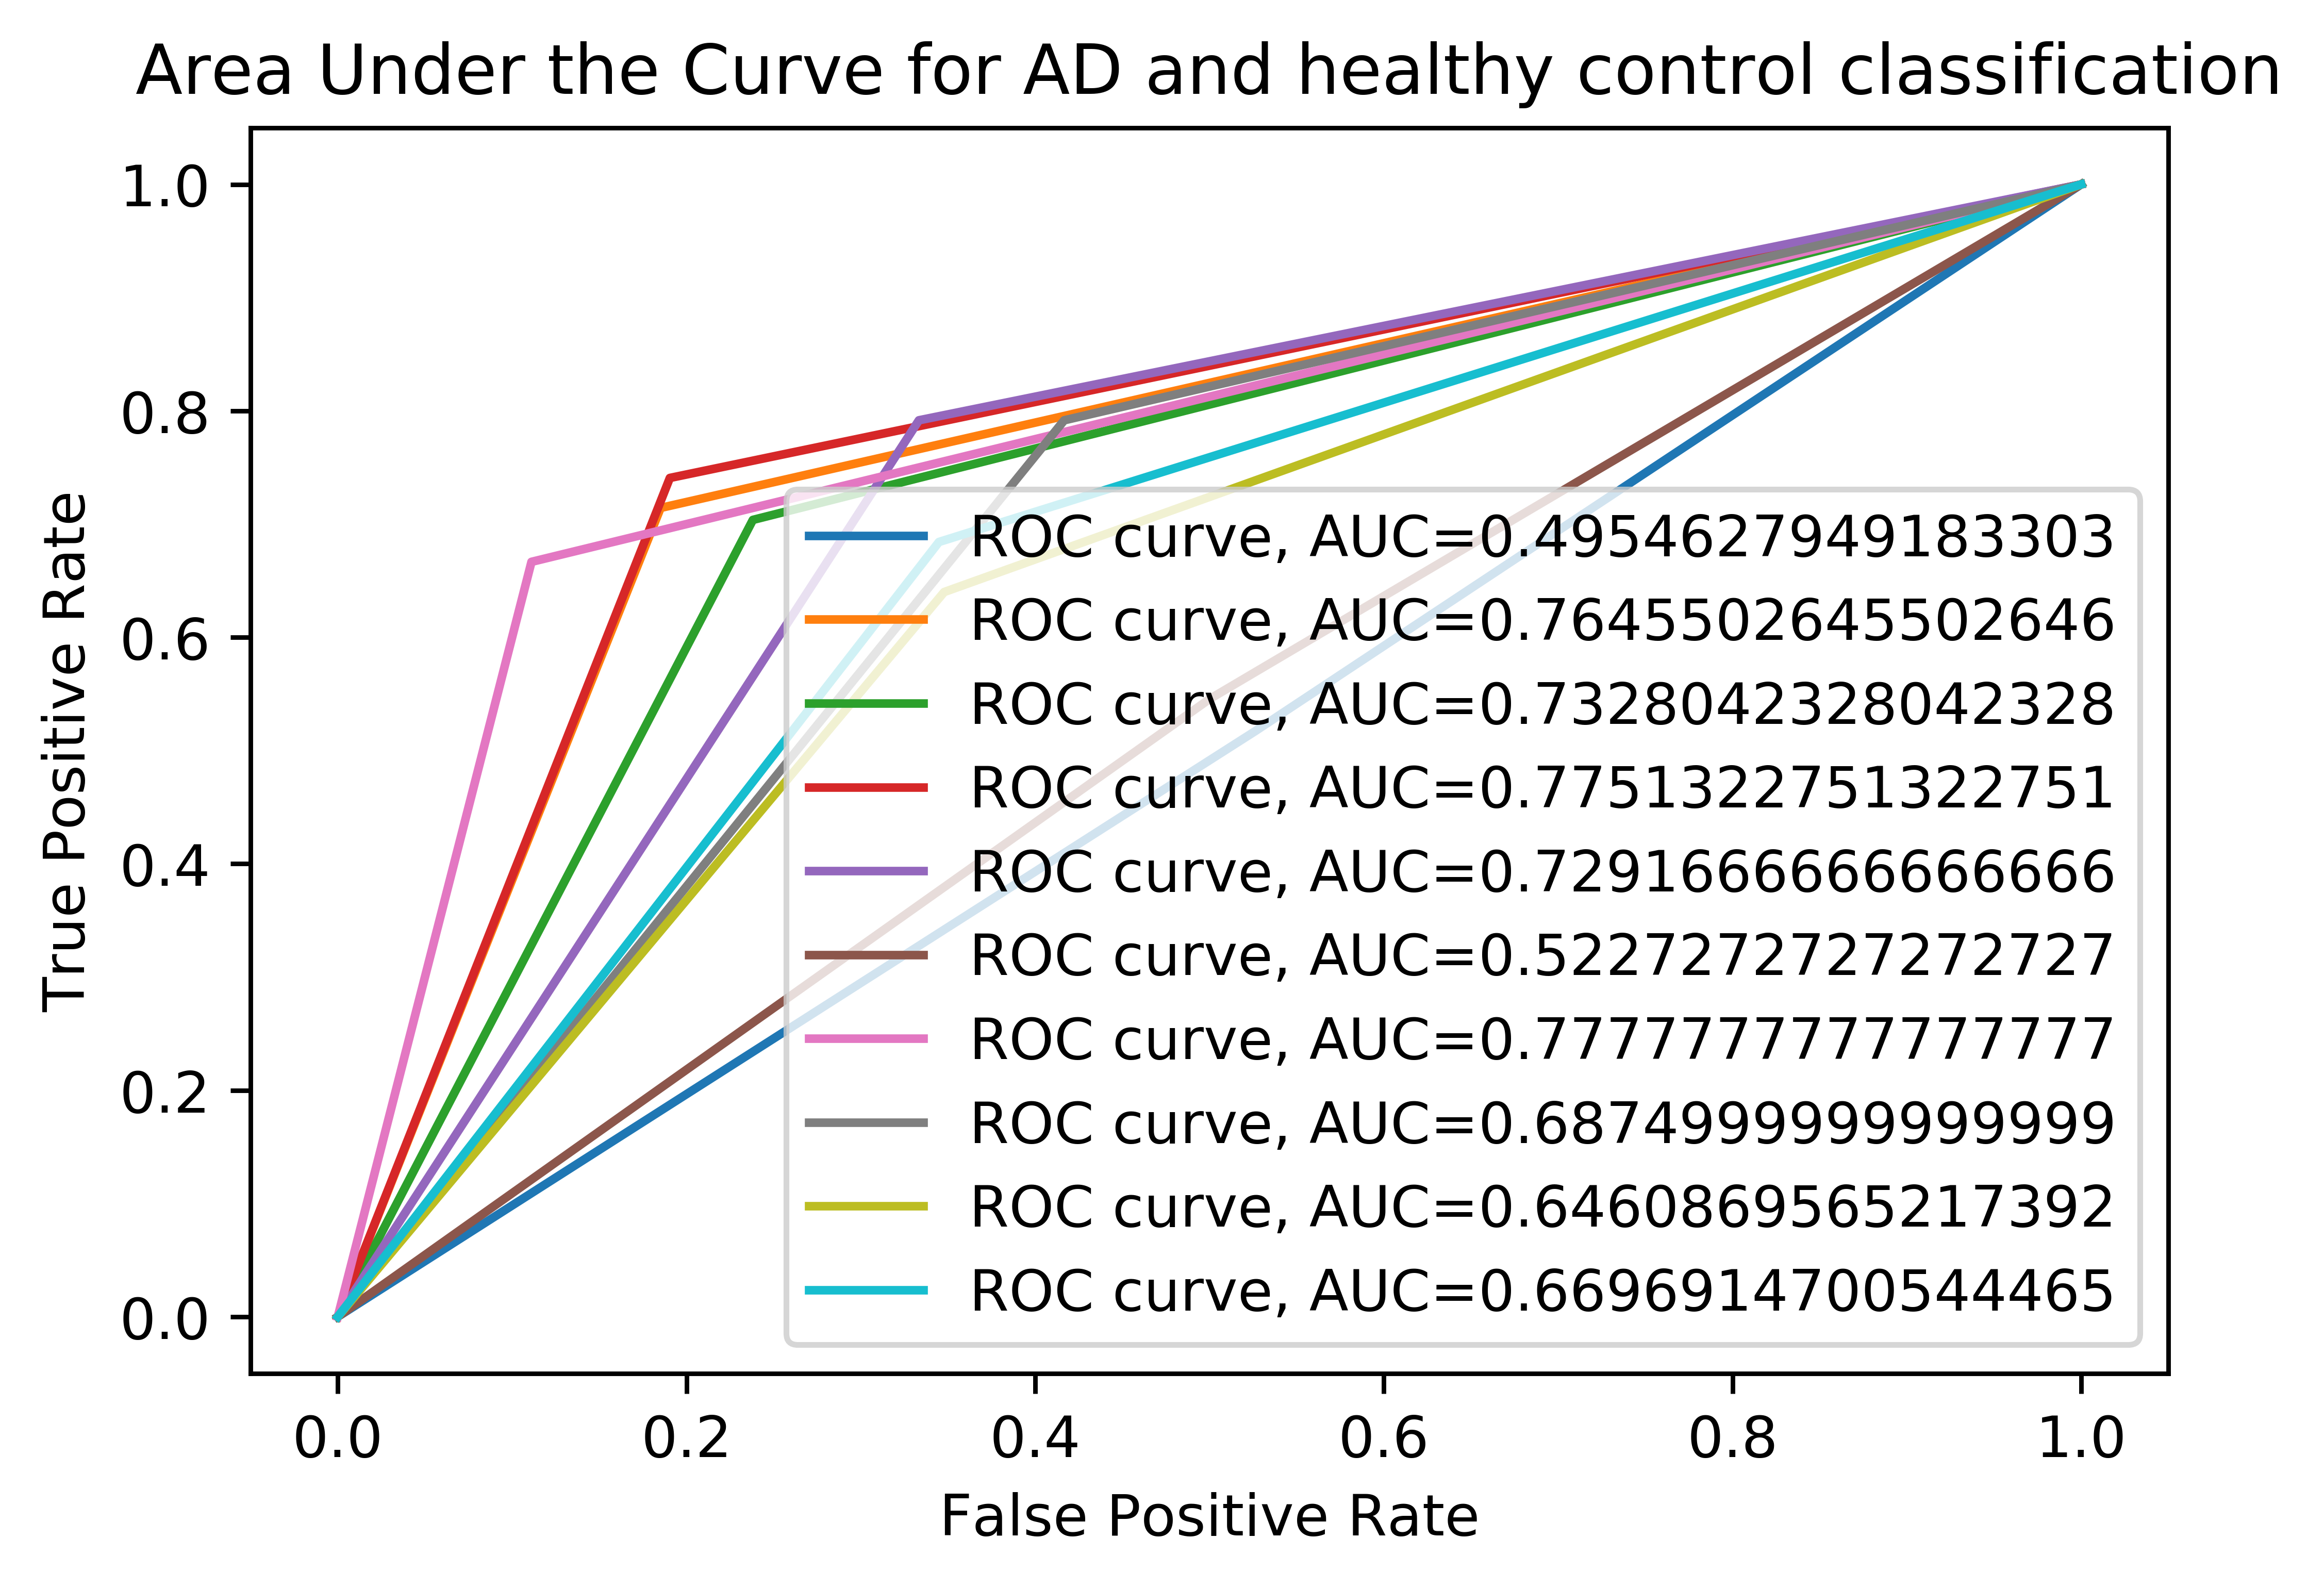

Test Accuracy: [0.5, 0.7708333333333334, 0.7291666666666666, 0.7708333333333334, 0.7291666666666666, 0.5208333333333334, 0.7916666666666666, 0.6875, 0.6458333333333334, 0.6666666666666666]
Test Accuracy Mean: 0.68125
Test Accuracy Std: 0.09639779417716061


In [64]:
#train test split and its function with the parameter # of times you want to see the validation accuracy
#also prints out maximum accuracy and its corresponding c each term, mean, and standard deviation
target = [1 if i == 'ProbableAD' else 0 for i in y_list] #这里要写啥
def run_classification_model(num_of_runs, X, target): #the function returns a list of test accuracy
    test_accuracy = [] #the list of accuracy should be empty before each time the function runs
    auc_list = []
    plt.figure(dpi = 800)
    for i in range(num_of_runs): #for loop that runs exact number of times requested
        print("run " + str(i)) #print out which run it is
        validation_accuracy = [] #the list of validation accuracy, the max will be drawn from it at the end
        X_train, X_test, y_train, y_test = train_test_split( #get a test set of 10% of the data, and a train set of 90%
            X, target, test_size = 0.1
        )

        X_train, X_val, y_train, y_val = train_test_split( #get a train set of 80%, and a validation set of 10%
            X_train, y_train, train_size = 0.89
        )
        
#         c_list = [0.099, 0.01, 0.05, 0.25, 0.5, 1, 10, 100, 1000, 1e10] #list of hyperparameters
#         for c in c_list: #test each c

#             lr = LogisticRegression(C=c) #imput the c
#             lr.fit(X_train, y_train) #fitting      

        clf = tree.DecisionTreeClassifier(max_depth=100, random_state=10)
        clf.fit(X_train, y_train)
        #其他的decision tree model
        #尝试一下random forest
        
        current_validation_accuracy = accuracy_score(y_val, clf.predict(X_val)) #calculate validation accuracy
        validation_accuracy.append(current_validation_accuracy) #append the list
            
        max_accuracy = max(validation_accuracy) #draw the maximum of validation accuracy
        index = np.argmax(validation_accuracy) #take the index of the maximum
#        c_optim = c_list[index] #take the corresponding c
#        print ("max validation accuracy is {} and optimal c is {}".format(max_accuracy, c_optim)) #print out the results
        
        # apply the best c to train the model
        clf_optim = tree.DecisionTreeClassifier(max_depth=100, random_state=10) #try the best c on test set
        clf_optim.fit(X_train, y_train) #fitting
        current_test_accuracy = accuracy_score(y_test, clf_optim.predict(X_test)) #calculate test accuracy
        test_accuracy.append(current_test_accuracy) #append test accuracy list
        
        #plot AUC
        y_pred_proba = clf_optim.predict_proba(X_test)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
        auc = metrics.roc_auc_score(y_test, y_pred_proba)
        auc_list.append(auc)
        plt.plot(fpr,tpr,label="ROC curve, AUC="+str(auc))   

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Area Under the Curve for AD and healthy control classification')
    plt.legend(loc=4)
    plt.savefig("doc2vec_roc.png", dpi = 800)
    plt.show()
    
    return test_accuracy, auc_list #return the list

test_accuracy, auc_list = run_classification_model(10, X.drop("category", axis=1), target) #call the function
mean_accuracy = np.mean(test_accuracy) #take the mean of test accuracy
std_accuracy = np.std(test_accuracy) #take standard deviation
print("Test Accuracy:",test_accuracy)
print("Test Accuracy Mean:",mean_accuracy)
print("Test Accuracy Std:",std_accuracy)

# Model Evaluation

In [32]:
print(np.mean(auc_list))
print(np.std(auc_list))

0.6639841290194501
0.05985120865805632


In [ ]:
#plot AUC
%matplotlib inline
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under the Curve for AD and healthy control classification')
plt.plot(fpr,tpr,label="ROC curve, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#rank the importance of features
print(lr.coef_)
print(lr.coef_.shape)
importance_rank = np.argsort(-abs(lr.coef_))
print(importance_rank[:10])

In [ ]:
#do we still need this?
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), final_model.coef_[0]
    )
}
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)
    
    

    
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (best_negative)